In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
img=cv2.imread("lena.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,w=img.shape[:2]

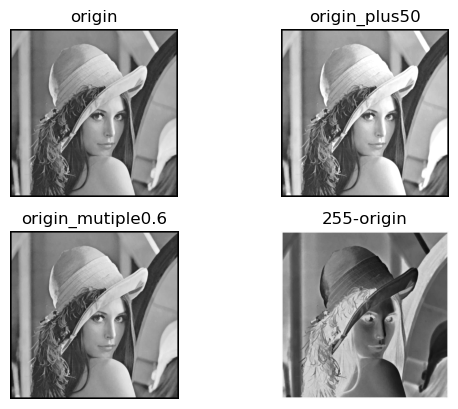

In [19]:
#线性点运算
img_1=np.zeros((w,h))
img_2=np.zeros((w,h))
img_3=np.zeros((w,h))
for i in range(h):
    for j in range(w):
        data=img[i][j]+50
        if data>255:
            img_1[i][j]=255
        else:
            img_1[i][j]=data
        data=img[i][j]*0.6
        if data>255:
            img_2[i][j]=255
        else:
            img_2[i][j]=data
        img_3[i][j]=255-img[i][j]
plt.subplot(221),plt.imshow(img,"gray"),plt.title("origin"),plt.axis("off")
plt.subplot(222),plt.imshow(img_1,"gray"),plt.title("origin_plus50"),plt.axis("off")
plt.subplot(223),plt.imshow(img_2,"gray"),plt.title("origin_mutiple0.6"),plt.axis("off")
plt.subplot(224),plt.imshow(img_3,"gray"),plt.title("255-origin"),plt.axis("off")
plt.show()


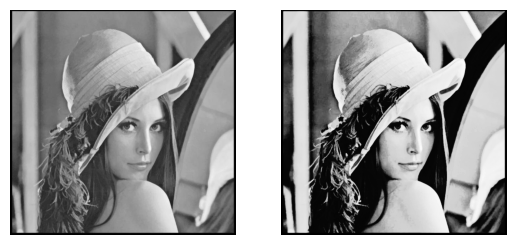

In [20]:
#分段线性点计算
x1,y1=80,10
x2,y2=140,200
k1=y1/x1
k2=(y2-y1)/(x2-x1)
k3=(255-y2)/(255-x2)
img_op=np.zeros((h,w))
for i in range(h):
    for j in range(w):
        if img[i][j]<x1:
            img_op[i][j]=img[i][j]*k1
        elif img[i][j]>=x1 and img[i][j]<=x2:
            img_op[i][j]=k2*(img[i][j]-x1)+y1
        else:
            img_op[i][j]=k3*(img[i][j]-x2)+y2
plt.subplot(121),plt.imshow(img,"gray"),plt.axis("off")
plt.subplot(122),plt.imshow(img_op,"gray"),plt.axis("off")
plt.show()


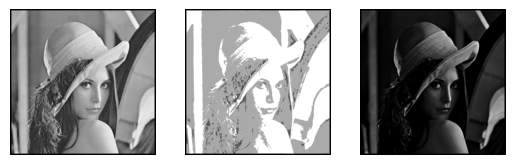

In [22]:
#非线性变换
#对数变换
def log_transfrom(img):
    output=np.log(10+img)
    return np.uint8(output)
#伽马变换
def gamma(img,c=0.00000005,v=4.0):
    lut=np.zeros(256,dtype=np.float32)
    for i in range(256):
        lut[i]=c*i**v
    output=cv2.LUT(img,lut)
    return np.uint8(output)
plt.subplot(131),plt.imshow(img,"gray"),plt.axis("off")
plt.subplot(132),plt.imshow(log_transfrom(img),"gray"),plt.axis("off")
plt.subplot(133),plt.imshow(gamma(img),"gray"),plt.axis("off")
plt.show()